# Workshop 6 : Pearson correlation coefficient

### Importing Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd

### Defining The Model

<Axes: xlabel='TV', ylabel='Sales'>

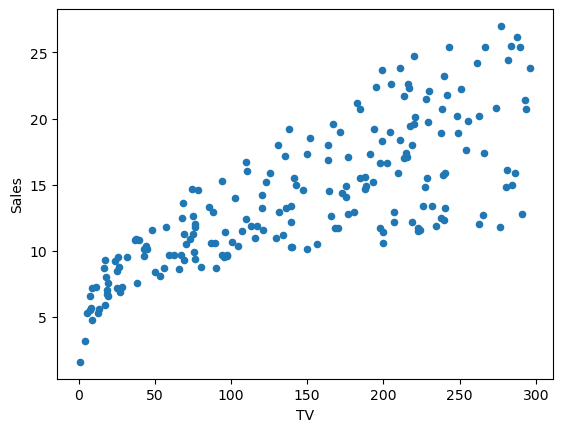

In [5]:
data = pd.read_csv('tvmarketing.csv')

# Extracting data
X = data['TV'].values
y = data['Sales'].values

data.head()
data.plot(x='TV',y='Sales',kind='scatter')


In [6]:
with pm.Model() as model:
    rho = pm.Uniform('rho', lower=-1, upper=1)
    sigma_x = pm.HalfNormal('sigma_x', sd=1)
    sigma_y = pm.HalfNormal('sigma_y', sd=1)

    cov_matrix = pm.math.stack(([sigma_x**2, rho * sigma_x * sigma_y],
                               [rho * sigma_x * sigma_y, sigma_y**2]))

    bivariate_normal = pm.MvNormal('bivariate_normal', mu=[np.mean(X), np.mean(y)], cov=cov_matrix, observed=np.vstack((X, y)).T)

    trace = pm.sample(2000, tune=2000, cores=8)

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [sigma_y, sigma_x, rho]


Sampling 8 chains for 2_000 tune and 2_000 draw iterations (16_000 + 16_000 draws total) took 278 seconds.
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


### Plotting and Visualising The Data

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
rho       0.443  0.028   0.394    0.497      0.000    0.000   13991.0   
sigma_x  33.394  0.487  32.459   34.270      0.004    0.003   16499.0   
sigma_y   3.552  0.144   3.282    3.821      0.001    0.001   14233.0   

         ess_tail  r_hat  
rho       10870.0    1.0  
sigma_x   11507.0    1.0  
sigma_y   11417.0    1.0  


c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


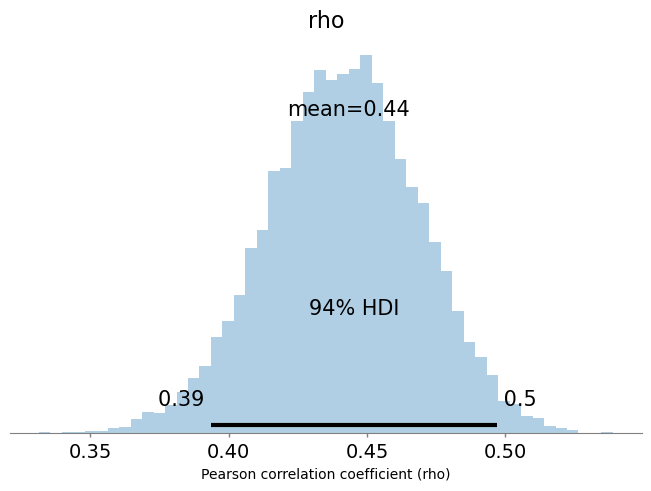

In [7]:
summary=pm.summary(trace)
print(summary)
pm.plot_posterior(trace,var_names=['rho'], kind='hist',bins=50)
plt.xlabel('Pearson correlation coefficient (rho)')
plt.show()